In [2]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("teacher_ratings.csv")

df.head()

,age,gender,beauty,eval,tenure,students,prof
0,57,Male,9.59,4.24,Yes,14,Prof_52
1,43,Male,9.53,9.58,No,38,Prof_93
2,36,Male,4.34,9.68,No,174,Prof_15
3,49,Male,6.13,9.40,Yes,145,Prof_72
4,47,Female,4.70,5.59,Yes,154,Prof_61


Q1. T-Test: Does gender affect teaching evaluation rates?

In [4]:
print(df.columns)

male = df[df['gender'] == 'male']['eval']
female = df[df['gender'] == 'female']['eval']

t_stat, p_val = stats.ttest_ind(male, female)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("There is a significant difference in evaluation rates by gender.")
else:
    print("No significant difference in evaluation rates by gender.")


Index(['age', 'gender', 'beauty', 'eval', 'tenure', 'students', 'prof'], dtype='object')
T-statistic: nan
P-value: nan
No significant difference in evaluation rates by gender.


Q2. ANOVA: Does beauty score differ by age group?

F-statistic: 0.6212004620590535
P-value: 0.6033284045133536
No significant difference in beauty score across age groups.


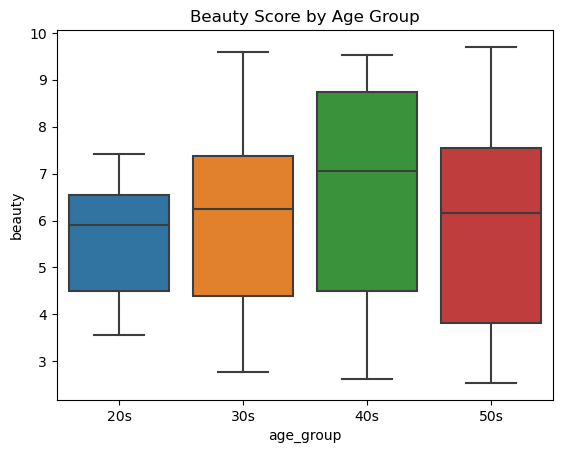

In [5]:
df['age_group'] = pd.cut(df['age'], bins=[20,30,40,50,60], labels=['20s','30s','40s','50s'])

# Perform one-way ANOVA
groups = [group['beauty'] for name, group in df.groupby('age_group')]
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Beauty score differs significantly across age groups.")
else:
    print("No significant difference in beauty score across age groups.")

# Optional: visualize
sns.boxplot(x='age_group', y='beauty', data=df)
plt.title("Beauty Score by Age Group")
plt.show()


Q3. Chi-square: Is there an association between tenure and gender?

In [6]:
contingency = pd.crosstab(df['tenure'], df['gender'])
print(contingency)

chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square:", chi2)
print("P-value:", p_val)

if p_val < 0.05:
    print("There is an association between tenure and gender.")
else:
    print("No significant association between tenure and gender.")


gender  Female  Male
tenure              
No          23    32
Yes         21    24
Chi-square: 0.08034894398530745
P-value: 0.7768250886158923
No significant association between tenure and gender.


Q4. Correlation: Is teaching evaluation correlated with beauty score?

Correlation coefficient: -0.30567933150226867
P-value: 0.0019831442189201815
Teaching evaluation is significantly correlated with beauty score.


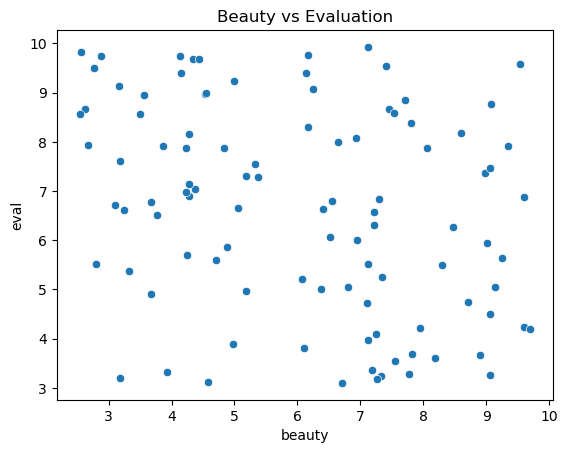

In [9]:
corr, p_val = stats.pearsonr(df['eval'], df['beauty'])

print("Correlation coefficient:", corr)
print("P-value:", p_val)

if p_val < 0.05:
    print("Teaching evaluation is significantly correlated with beauty score.")
else:
    print("No significant correlation between evaluation and beauty score.")

# Optional: visualize
sns.scatterplot(x='beauty', y='eval', data=df)
plt.title("Beauty vs Evaluation")
plt.show()
